**https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3**

http://sdsawtelle.github.io/blog/output/week9-anomaly-andrew-ng-machine-learning-with-python.html#Try-IsolationForests-for-High-Dimensions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from matplotlib import patches
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv
path = "/content/drive/My Drive/data/creditcard.csv"
df = pd.read_csv(path)
#df

https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3

In [ ]:
df_features = df.drop(['Time', 'Class'], 1)

In [ ]:
df_features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
#df_features = df_features.to_numpy()

In [ ]:
df_labels = df['Class']

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

In [ ]:
df_labels.unique()

array([0, 1])

**One-Class SVM**
1. https://machinelearningmastery.com/one-class-classification-algorithms/
2. https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html
3. https://analyticsindiamag.com/how-to-use-support-vector-machines-for-one-class-classification/
4. http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/
5. https://machinelearningmastery.com/one-class-classification-algorithms/

In [ ]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(scaled_features, df_labels, test_size=0.5, random_state=2, stratify=df_labels)
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.163


**K-Means** 


https://realpython.com/k-means-clustering-python/

Partitional clustering methods have several strengths:

*   They work well when clusters have a spherical shape.
*   They’re scalable with respect to algorithm complexity.

They also have several weaknesses:


*   They’re not well suited for clusters with complex shapes and different sizes.
*   They break down when used with clusters of different densities.






In [ ]:
!pip install kneed

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_features[:1]

array([[-0.69424232, -0.04407492,  1.6727735 ,  0.97336551, -0.24511658,
         0.34706795,  0.19367894,  0.08263728,  0.33112778,  0.08338555,
        -0.54040704, -0.61829572, -0.99609892, -0.32461019,  1.60401384,
        -0.53683287,  0.24486345,  0.03076993,  0.49628203,  0.32611802,
        -0.02492336,  0.38285444, -0.17691133,  0.11050692,  0.24658544,
        -0.39217043,  0.33089162, -0.06378115,  0.24496426]])

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

In [ ]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)

7968049.060373116
[[ 2.76200630e-02 -8.55930865e-01 -1.15420801e-01 -6.82129653e-01
  -7.22572335e-01  1.37032524e-01 -2.57404024e-01 -4.92741497e-02
  -9.36648822e-01  6.02039958e-01 -1.51840666e-01 -2.77771519e-01
   2.35888938e-01 -1.36578622e-01 -1.04540854e-01 -1.04630763e+00
   1.03386406e-01  8.53537789e-01 -4.98987507e-01 -8.76726002e-02
  -1.57793457e-01 -3.54989759e-01 -2.19270155e-02 -1.64585459e-02
  -6.96856737e-02 -3.36551424e-03  1.95762634e-02  1.01268889e-02
   6.62638241e-01]
 [-4.76189556e-03  1.47568577e-01  1.98993681e-02  1.17604010e-01
   1.24576616e-01 -2.36253829e-02  4.43782869e-02  8.49521432e-03
   1.61484927e-01 -1.03795976e-01  2.61784122e-02  4.78897880e-02
  -4.06689328e-02  2.35471271e-02  1.80235878e-02  1.80390887e-01
  -1.78245527e-02 -1.47155993e-01  8.60289998e-02  1.51153806e-02
   2.72047158e-02  6.12027625e-02  3.78037363e-03  2.83757052e-03
   1.20143064e-02  5.80238623e-04 -3.37508722e-03 -1.74594777e-03
  -1.14243552e-01]]
15


In [ ]:
kmeans.labels_[:5]

array([1, 1, 0, 0, 1], dtype=int32)

find number of k using elbow method

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 20,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

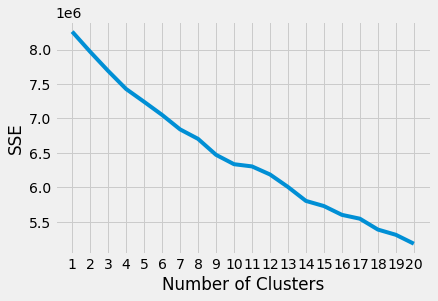

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
    range(1, 21), sse, curve="convex", direction="decreasing"
    )

kl.elbow

9

Silhoutte coefficient

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Use pipeline and dimensionality reduction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
n_clusters = 2

In [ ]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [ ]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [ ]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [ ]:
pipe.fit(df_features)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=2, n_init=50,
                                         random_state=42))]))])

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(df_features)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.34146569798351595

**DB-SCAN**

1. https://donernesto.github.io/blog/outlier-detection-with-dbscan/
2. 

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_features)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(scaled_features)

In [ ]:
labels=dbscan.labels_

In [ ]:
len(dbscan.labels_)

284807

In [ ]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)

In [ ]:
print(n_clusters)

3461


In [ ]:
import collections, numpy
a = numpy.array(dbscan.labels_)
collections.Counter(a)

**Isolation Forest: Base Model for point outliers in multivariate outliers detection**

1. https://medium.com/analytics-vidhya/anomaly-detection-in-python-part-1-basics-code-and-standard-algorithms-37d022cdbcff
2. https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/
3. https://stackoverflow.com/questions/50957340/isolation-forest-sklearn-for-1d-array-or-list-and-how-to-tune-hyper-parameters



Let us look at the complete algorithm step by step:

1.   When given a dataset, a random sub-sample of the data is selected and assigned to a binary tree.
2.   Branching of the tree starts by selecting a random feature (from the set of all N features) first. And then branching is done on a random threshold ( any value in the range of minimum and maximum values of the selected feature).
3. If the value of a data point is less than the selected threshold, it goes to the left branch else to the right. And thus a node is split into left and right branches.
4. This process from step 2 is continued recursively till each data point is completely isolated or till max depth(if defined) is reached.
The above steps are repeated to construct random binary trees.






In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Separate the classes from the train set
#df_classes = df_base['Class']
#df_train = df_base.drop(['Class'], axis=1)

# split the data into train and test 
#X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.30, random_state=42)

In [ ]:
random_state = np.random.RandomState(42)

In [ ]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.02),random_state=random_state)
model.fit(df_features.values)
print(model.get_params())

{'bootstrap': False, 'contamination': 0.02, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F8D6F892E20, 'verbose': 0, 'warm_start': False}


In [ ]:
df_features['scores']  = model.decision_function(df_features.values)


In [ ]:
df_anomaly_score = df_features.drop(['scores'], 1)

In [ ]:
df_features['anomaly_score'] = model.predict(df_anomaly_score.values)

In [ ]:
df_features[df_features['anomaly_score']==-1].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly_score
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-0.010101,-1
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,-0.039264,-1
14,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,1.151087,0.844555,0.792944,0.370448,-0.734975,0.406796,-0.303058,-0.155869,0.778265,2.221868,-1.582122,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,-0.006530,-1
18,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,0.917230,0.970117,-0.266568,-0.479130,-0.526609,0.472004,-0.725481,0.075081,-0.406867,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,-0.058501,-1
23,0.247491,0.277666,1.185471,-0.092603,-1.314394,-0.150116,-0.946365,-1.617935,1.544071,-0.829881,-0.583200,0.524933,-0.453375,0.081393,1.555204,-1.396895,0.783131,0.436621,2.177807,-0.230983,1.650180,0.200454,-0.185353,0.423073,0.820591,-0.227632,0.336634,0.250475,22.75,-0.015583,-1


In [ ]:
number_anomalies = list(df_features['anomaly_score']).count(-1)
print("Number of anomalies:", number_anomalies)

Number of anomalies: 56962


In [ ]:
print(len(df_features))

284807


**Gaussian Mixture Model**
1. https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/
2. https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
3. https://scikit-learn.org/stable/modules/mixture.html


In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(df_features)

#predictions from gmm
labels = gmm.predict(df_features)
frame = pd.DataFrame(df_features)
frame['cluster'] = labels



In [ ]:
frame['cluster']

0         2
1         0
2         2
3         2
4         2
         ..
284802    3
284803    2
284804    0
284805    2
284806    2
Name: cluster, Length: 284807, dtype: int64

**Facebook Prophet**






**https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a**

**VAR MODEL**
1. https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
2. 